<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#To-dos" data-toc-modified-id="To-dos-1">To dos</a></span></li><li><span><a href="#POST-Forms" data-toc-modified-id="POST-Forms-2">POST Forms</a></span></li><li><span><a href="#Finding-our-form-data" data-toc-modified-id="Finding-our-form-data-3">Finding our form data</a></span></li><li><span><a href="#Sending-data-with-the-form-request" data-toc-modified-id="Sending-data-with-the-form-request-4">Sending data with the form request</a></span></li><li><span><a href="#Sending-headers-with-your-request" data-toc-modified-id="Sending-headers-with-your-request-5">Sending headers with your request</a></span><ul class="toc-item"><li><span><a href="#Pretending-to-be-the-browser" data-toc-modified-id="Pretending-to-be-the-browser-5.1">Pretending to be the browser</a></span></li><li><span><a href="#Finding-the-appropriate-headers" data-toc-modified-id="Finding-the-appropriate-headers-5.2">Finding the appropriate headers</a></span></li></ul></li><li><span><a href="#Identifying-a-session-ID" data-toc-modified-id="Identifying-a-session-ID-6">Identifying a session ID</a></span></li><li><span><a href="#Downloading-an-attachment-from-the-response" data-toc-modified-id="Downloading-an-attachment-from-the-response-7">Downloading an attachment from the response</a></span></li></ul></div>

## To dos
* Add code to modify file name based on parameters (all files are named `"Multiple Cause of Death, 1999-2017.txt"` by default) - this could be extracted from the form data dictionary
* Add failure logic when there's no attachment (i.e. when the response has a 200 status but actually failed)
* Add other failure logic

This notebook is adapted from http://jonathansoma.com/lede/foundations-2017/classes/adv-scraping/advanced-scraping-form-submission/.

In [1]:
import requests
import re

## POST Forms

But for most forms, though, it isn't that easy. You type in your info, you click "Search", and *there's nothing in the URL.* For example, try searching at [California's Engineer License Database](http://www2.dca.ca.gov/pls/wllpub/wllqryna$lcev2.startup?p_qte_code=ENG&p_qte_pgm_code=7500).

The URL you end up at is something like `http://www2.dca.ca.gov/pls/wllpub/WLLQRYNA$LCEV2.ActionQuery`, which doesn't mean *anything*. No parameters in that query string!

If you search through the browser you see a lot of table rows, but if you try it in Python it doesn't give you anything.

## Finding our form data

When we clicked "Search," it also sent the server a bunch of data - all of the options we typed in, or the dropdowns we selected. Here are the steps to find out what data needs to be sent along with your request.

We're going to use Chrome's **Network tools** to analyze all of the requests our browser sends to the server, then imitate them in Python.

1. Open up **Developer Tools** in Chrome by selecting `View > Developer > Developer Tools`.
2. Select the **Network Tab**
3. Visit the page you're going to do your search from
4. Click the **Clear** button up top - 🚫 - then submit your form
5. The Network tab will fill with activity!
6. Find the thing in the Network tab that looks like the same name as your webpage. Click it.
7. On the right-hand side you get a new pane. If you scroll allllll the way down it lists **Form Data**.

This **Form Data** is what we need to send along with our request. We just need to convert it to a dictionary and send it along.

## Sending data with the form request

Once we've converted our form data into a dictionary, we need to make sure of two things:

1. We're using `requests.post` to make our request
2. We're sending the form data with the request

Normal browser requests are sent as `GET` requests, but these very fancy ones are sent as `POST`. `POST` just means "hey I'm sending extra data along with this."

In [2]:
# This is pasted from the Form Data section of the Network tab's Headers section

data = {
'dataset_code': 'D77',
'dataset_label': 'Multiple Cause of Death, 1999-2017',
'dataset_vintage': '2017',
'stage': 'request',
'O_javascript': 'on',
'M_1': 'D77.M1',
'M_2': 'D77.M2',
'M_3': 'D77.M3',
'O_aar': 'aar_none',
'B_1': 'D77.V9-level2',
'B_2': 'D77.V5',
'B_3': 'D77.V8',
'B_4': 'D77.V2-level3',
'B_5': 'D77.V13-level3',
'O_title': '',
'O_oc-sect1-request': 'close',
'O_rate_per': '100000',
'O_aar_pop': '0000',
'VM_D77.M6_D77.V1_S': '*All*',
'VM_D77.M6_D77.V7': '*All*',
'VM_D77.M6_D77.V17': '*All*',
'VM_D77.M6_D77.V8': '*All*',
'VM_D77.M6_D77.V10': '',
'O_location': 'D77.V9',
'finder-stage-D77.V9': 'codeset',
'O_V9_fmode': 'freg',
'V_D77.V9': '',
'F_D77.V9': '01',
'I_D77.V9': '01 (Alabama)',
'finder-stage-D77.V10': 'codeset',
'O_V10_fmode': 'freg',
'V_D77.V10': '',
'F_D77.V10': '*All*',
'I_D77.V10': '*All* (The United States)',
'finder-stage-D77.V27': 'codeset',
'O_V27_fmode': 'freg',
'V_D77.V27': '',
'F_D77.V27': '*All*',
'I_D77.V27': '*All* (The United States)',
'O_urban': 'D77.V19',
'V_D77.V19': '*All*',
'V_D77.V11': '*All*',
'O_age': 'D77.V5',
'V_D77.V5': '*All*',
'V_D77.V51': '*All*',
'V_D77.V52': '*All*',
'V_D77.V6': '00',
'V_D77.V7': 'M',
'V_D77.V17': '*All*',
'V_D77.V8': '*All*',
'finder-stage-D77.V1': 'codeset',
'O_V1_fmode': 'freg',
'V_D77.V1': '',
'F_D77.V1': '2015',
'I_D77.V1': '2015 (2015)',
'V_D77.V24': '*All*',
'V_D77.V20': '*All*',
'V_D77.V21': '*All*',
'O_ucd': 'D77.V2',
'finder-stage-D77.V2': 'codeset',
'O_V2_fmode': 'freg',
'V_D77.V2': '',
'F_D77.V2': '*All*',
'I_D77.V2': '*All* (All Causes of Death)',
'V_D77.V4': '*All*',
'V_D77.V12': '*All*',
'V_D77.V22': '*All*',
'V_D77.V23': '*All*',
'finder-stage-D77.V25': 'codeset',
'O_V25_fmode': 'freg',
'V_D77.V25': '',
'F_D77.V25': '*All*',
'I_D77.V25': 'All Causes of Death',
'O_mcd': 'D77.V13',
'finder-stage-D77.V13': 'codeset',
'O_V13_fmode': 'fadv',
'V_D77.V13': '',
'V_D77.V13_AND': '',
'F_D77.V13': '*All*',
'finder-stage-D77.V15': '',
'O_V15_fmode': 'fadv',
'V_D77.V15': '',
'V_D77.V15_AND': '',
'L_D77.V15': '*All*',
'finder-stage-D77.V16': '',
'O_V16_fmode': 'fadv',
'V_D77.V16': '',
'V_D77.V16_AND': '',
'L_D77.V16': '*All*',
'finder-stage-D77.V26': 'codeset',
'O_V26_fmode': 'fadv',
'V_D77.V26': '',
'V_D77.V26_AND': '',
'F_D77.V26': '*All*',
'O_change_action-Send-Export Results': 'Export Results',
'O_precision': '1',
'O_timeout': '600',
'action-Send': 'Send'
}

The group-by options (`B_1` through `B_5`) are pictured below.

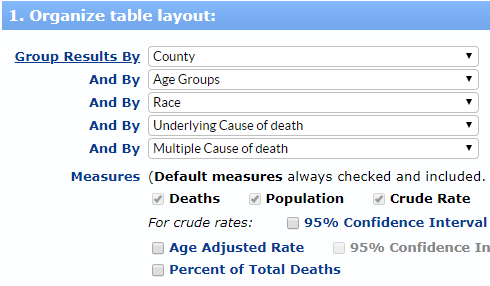

The example form data also filters to Alabama, Male, 2015:

* Alabama
    * `'F_D77.V9': '01'`
    * `'I_D77.V9': '01 (Alabama)'`
* 2015
    * `'F_D77.V1': '2015'`
    * `'I_D77.V1': '2015 (2015)'`
* Male
    * `'V_D77.V7': 'M'`

## Sending headers with your request

Sometimes that isn't enough! Some web servers check to make sure you're a real browser, or you came from their site, or other stuff like that.

When you send a request, you also send thing called "Headers." You can see the headers inside of the same Network tab part where you found Form Data. It's listed as **Request Headers** - *ignore the response headers*.

### Pretending to be the browser

The most common thing you'll need to do is impersonate a browser by sending a `User-Agent` string.

### Finding the appropriate headers

Sometimes pretending to be the browser just isn't enough. If you want to 100% imitate your browser when sending a request, you need to copy aaaaalllll of the headers from the request.

It's just above the Form Data information, but I'll tell you how to find it again just to be sure:

1. Open up **Developer Tools** in Chrome by selecting `View > Developer > Developer Tools`.
2. Select the **Network Tab**
3. Visit the page you're going to do your search from
4. Click the **Clear** button up top - 🚫 - then submit your form
5. The Network tab will fill with activity!
6. Find the thing in the Network tab that looks like the same name as your webpage. Click it.
7. On the right-hand side you get a new pane. If you scroll near to the bottom it shows you **Request Headers**.

You just need to convert these into a dictionary, and send them along with your request.

In [3]:
# Here are all of our headers
headers = {
'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
'Accept-Encoding': 'gzip, deflate, br',
'Accept-Language': 'en-US,en;q=0.9,ru;q=0.8',
'Cache-Control': 'max-age=0',
'Connection': 'keep-alive',
'Content-Length': '1846',
'Content-Type': 'application/x-www-form-urlencoded',
'Cookie': 's_fid=4462B5BDCB3B8F57-1419BC1F65A8E073; _ga=GA1.3.2116417692.1569546073; _ga=GA1.2.558629946.1569855020; _4c_=XVRdb9owFP0rUx761Hw4ie0EqZog0EJVSksyVesLSmxDPEISJYaMVfz32cGwrrxw7vG5Hzb38GF0OSuNAYAYAAQChAFyb40tO7bG4MNoOFVfB2NgYMZc5pDQdAHBph8AaGbU8UwfrUnm4TQjKTBujd99LYw84LiOh%2BHp1qDlpUbDKGv5pvykgzgIYeh4UscvsvTLOXKAK8%2BbTguuBxiG%2BH%2BpYqSU1Fr6YeybQpbMhajbgW13XWcRSqxNdbBLkrd2eWhbmx7aFU1FumpYwdKWWbnYyRlIRZnMBaHlWUjG4o%2BMTN91JK6biu6JWIljrTQdy761dCsPKDtwwlYdpyLvk3u5ZnPGN7lQtBP0dN2oQKKOl7TqvqZp9poWeliySVUnnKnMnzJaxJOnWGIFh%2BPojO6L%2FRk8R9NpnLycg1n5a98cdd7kZXlmo2q325dcHB%2F2vL%2Bw4vKmKjnR0udothxf8eR9Ntb94uQp0b0fiipLiylLi%2F4Ckhkm8Xh5mWIy1flxnZa81ZL5%2FG2p%2BRFvRD5ma0ZEq5Nmi3iqG71ML9MuosVCJ89ijR6rTOe88216RllTdW3%2FSOouO%2FYNq6erlO6tf9VWho3s1zS9SkYtF%2Br6ej80Ia1w5lTvebJcjSbDaPH8aaeUHgDXcitslUzYmS1XSpJqx4D9GJuu5ViO3SLoIwh9F4Y%2BBuH34evoDtysOb3zfeSO4GgcjbxRcA%2BxCXwQjiJwj%2BAwmDjYuxm%2BTu7UltTKHq4nUVGRtFDTMuWmh%2BHqR%2F%2BjQBggNwx9ZAGIwgBCp9%2BjpOGbDWvmTOSVdLSMU8oFr8q0MM4G%2FexNqlZNRltR1Vf6dDEacP3ARb7vAekIIc0VIN9RH6k4XD3ssMAhOPPMEHlr0wdwbYYEEJPCdegwyORo%2F2wu%2F3o8JEu6vi4JgnPF0%2Bkv; _gid=GA1.3.194714825.1571799780; s_vnum=1572591600430%26vn%3D12; s_invisit=true; s_lv_s=Less%20than%201%20day; s_visit=1; s_cc=true; gpv_v45=Multiple%20Cause%20of%20Death%2C%201999-2017%20Request%20Form; TS0121a97c=015d0abe87ce49e0c460156cb8fcfc1bbc4821eb32fa06765a764a225cbbb5de9c4fdd9d6daf0994aba0eb329c2441aeadded53f1e831e73523fb2527dcf1eb6df289db6a0; gpv_c54=https%3A%2F%2Fwonder.cdc.gov%2Fcontroller%2Fdatarequest%2FD77%3Bjsessionid%3D08630FAA4A1B4D53E5F6BC9FD4F08A2E; s_ppvl=Multiple%2520Cause%2520of%2520Death%252C%25201999-2017%2520Request%2520Form%2C23%2C100%2C4118%2C1920%2C937%2C1920%2C1080%2C1%2CL; s_ptc=0.00%5E%5E0.00%5E%5E0.00%5E%5E0.00%5E%5E7.10%5E%5E0.65%5E%5E1.06%5E%5E0.02%5E%5E8.20; s_ppv=Multiple%2520Cause%2520of%2520Death%252C%25201999-2017%2520Request%2520Form%2C22%2C100%2C4189%2C1920%2C937%2C1920%2C1080%2C1%2CL; s_tps=136; s_pvs=143; s_lv=1571837586026; s_sq=cdcgov%3D%2526pid%253DMultiple%252520Cause%252520of%252520Death%25252C%2525201999-2017%252520Request%252520Form%2526pidt%253D1%2526oid%253Dfunctiononclick%252528event%252529%25257BsubmitSet%252528this%252529%25253B%25257D%2526oidt%253D2%2526ot%253DSUBMIT',
'DNT': '1',
'Host': 'wonder.cdc.gov',
'Origin': 'https://wonder.cdc.gov',
'Referer': 'https://wonder.cdc.gov/controller/datarequest/D77;jsessionid=08630FAA4A1B4D53E5F6BC9FD4F08A2E',
'Sec-Fetch-Mode': 'navigate',
'Sec-Fetch-Site': 'same-origin',
'Sec-Fetch-User': '?1',
'Upgrade-Insecure-Requests': '1',
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36',
}

## Identifying a session ID
For CDC WONDER, make sure to launch the page manually; you'll get prompted to click "I Agree". This generates a unique session ID, which allows you to send requests.

Your **actual** request URL has this session ID in it. Here's how to find it:
1. Open up the **Developer Tools**
2. Select the **Network Tab**
3. At the very top, under **General**, copy the **Request URL**

For example, this is a request URL: `https://wonder.cdc.gov/controller/datarequest/D77;jsessionid=08630FAA4A1B4D53E5F6BC9FD4F08A2E`

In [4]:
# Replace below with your own session
# I'm not sure how long the session is good for
url = 'https://wonder.cdc.gov/controller/datarequest/D77;jsessionid=9A5F5052574EB5A98BB20586DA4A784A'

## Downloading an attachment from the response
The final thing we'll need to do is download a file. The response is going to be an attachment in the form of `response.content`.

The code below parses the response header's `content-disposition` item for the text `filename`, finds the file name that follows, then writes the response content with that file name.

In [5]:
# https://www.codementor.io/aviaryan/downloading-files-from-urls-in-python-77q3bs0un

def get_filename_from_cd(cd):
    """
    Get filename from content-disposition
    """
    if not cd:
        return None
    fname = re.findall('filename=(.+)', cd)
    if len(fname) == 0:
        return None
    return fname[0].replace('"','')

# Get the page using .post
# send the data and headers
response = requests.post(url, data=data, headers=headers)

# Identify the file name and write to a file
filename = get_filename_from_cd(response.headers.get('content-disposition'))
open(filename, 'wb').write(response.content)

54196

The file should now exist in the same directory as this notebook.